## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data
Data obtained from [sudalairajkumar-Cryptocurrency Historical Prices
](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/version/3).

In [2]:
CSV_PATH = 'machine-learning-projects/linreg-crypto-price-predictor/coin_Bitcoin.csv'
coin_price_df = pd.read_csv(CSV_PATH)
print(coin_price_df.head(5))
print('Shape:', coin_price_df.shape)

   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  
Shape: (2991, 10)


## Preprocess Data

In [3]:
%matplotlib

price_data_close = coin_price_df.Close
price_data_30d_ma = np.convolve(coin_price_df.Close, np.ones(30) / 30, mode='valid')

# Plotting close prices and 30-day moving averages
fig, axs = plt.subplots(1, 2)
axs[0].plot(price_data_close)
axs[0].set_title('Per day price movement')
axs[0].set(xlabel='2013-04-29 to 2021-07-01', ylabel='Price in USD')

axs[1].plot(price_data_30d_ma)
axs[1].set_title('Per day price movement')
axs[1].set(xlabel='2013-04-29 to 2021-07-01', ylabel='Price in USD')

fig.show()

Using matplotlib backend: Qt5Agg


libGL error: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: radeonsi
libGL error: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: radeonsi
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


## Training Data Generation

In [4]:
price_data_close_batch = None
price_data_batch_label = []
for i in range(30, price_data_close.shape[0]):
    if price_data_close_batch is None:
        price_data_close_batch = price_data_close[0 : i]
        price_data_close_batch = np.expand_dims(price_data_close_batch, 1)
        price_data_batch_label.append(price_data_close[i+1])
    else:
        data = np.expand_dims(price_data_close[i : i + 30], 1)
        if data.shape[0] != 30:
            continue
        price_data_close_batch = np.concatenate(
            (price_data_close_batch, data),
            axis=1
        )
        price_data_batch_label.append(price_data_close[i+1])

price_data_close_batch = price_data_close_batch.T
price_data_batch_label = np.array(price_data_batch_label)
print("Batch shape (batch_size, data_len):", price_data_close_batch.shape) 
print("Batch label shape:", price_data_batch_label.shape) 

Batch shape (batch_size, data_len): (2932, 30)
Batch label shape: (2932,)


# Hyperparameters

In [5]:
NUM_EPOCHS = 100000
BATCH_SIZE = 100
LR = 0.00000008

# Training

In [6]:
def gradientDescent(x, y, weight, lr, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        predicted = np.dot(x, weight)
        loss = predicted - y
        cost = np.sum(loss ** 2) / (2 * m)
        if i % 5000 == 4999:
            print("Iteration %d | Cost: %f" % (i+1, cost))
        
        gradient = np.dot(xTrans, loss) / m
        weight = weight - lr * gradient
    return weight

_, n = price_data_close_batch.shape
weight = np.zeros(n)
weight = gradientDescent(price_data_close_batch[0:BATCH_SIZE, :], price_data_batch_label[0:BATCH_SIZE], weight, LR, BATCH_SIZE, NUM_EPOCHS)

print("Weight: ", weight)

Iteration 5000 | Cost: 35.926711
Iteration 10000 | Cost: 22.447642
Iteration 15000 | Cost: 15.700376
Iteration 20000 | Cost: 12.025544
Iteration 25000 | Cost: 9.814249
Iteration 30000 | Cost: 8.345946
Iteration 35000 | Cost: 7.287881
Iteration 40000 | Cost: 6.478828
Iteration 45000 | Cost: 5.835137
Iteration 50000 | Cost: 5.309538
Iteration 55000 | Cost: 4.872776
Iteration 60000 | Cost: 4.505201
Iteration 65000 | Cost: 4.192746
Iteration 70000 | Cost: 3.924885
Iteration 75000 | Cost: 3.693508
Iteration 80000 | Cost: 3.492248
Iteration 85000 | Cost: 3.316041
Iteration 90000 | Cost: 3.160821
Iteration 95000 | Cost: 3.023301
Iteration 100000 | Cost: 2.900805
Weight:  [ 0.26433101  0.28535608  0.19263055  0.14277393  0.07669857  0.04949034
  0.01811641  0.00685494 -0.00547004 -0.00773572 -0.01430362 -0.00816751
  0.00031357 -0.00139005  0.00986123 -0.00161106  0.00624076 -0.00407024
  0.00688139  0.00305764  0.01244421  0.01324876  0.00683463  0.00297623
 -0.01102061 -0.00967735 -0.0122482

# Graphing Actual vs Predicted

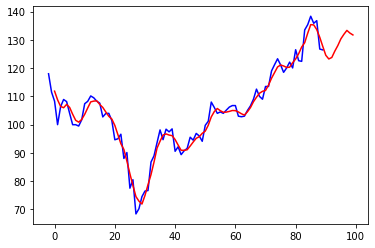

In [7]:
%matplotlib inline

START_BATCH = 8
plt.plot([i for i in range(START_BATCH-10, BATCH_SIZE-10)], price_data_close[START_BATCH+30:30+BATCH_SIZE], color='b')
plt.plot(np.dot(price_data_close_batch[START_BATCH:START_BATCH+BATCH_SIZE, :], weight), color='r')
plt.show()

In [8]:
%matplotlib

# Plotting close prices and 30-day moving averages
fig, axs = plt.subplots(1, 2)
axs[0].plot([i for i in range(START_BATCH-10, BATCH_SIZE-10)], price_data_close[START_BATCH+30:30+BATCH_SIZE])
axs[0].set_title('Actual Prices')
axs[0].set(ylabel='Price in USD')

axs[1].plot(np.dot(price_data_close_batch[START_BATCH:START_BATCH+BATCH_SIZE, :], weight), color='r')
axs[1].set_title('Predicted Prices')
axs[1].set(ylabel='Price in USD')

fig.show()

Using matplotlib backend: Qt5Agg
